In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import torch

from PIL import Image
import os
from os.path import isfile
import shutil

Image.MAX_IMAGE_PIXELS = 150000000

from dataset_operations import reset_dir,clean_dir
            
import torch
torch.cuda.empty_cache()

# Parameters
tile_size = 512  
stride = tile_size // 2

# ROI images are the smallest bounding box on a rotated ROI. Usually you want to mask out
# the regions that were not in the actualy ROI since these would not have been annotated.
# ROIs in the ROIS.zip file already have these masked out so this is not needed unless
# you would like to change the bounding box color. Note that the text files in boundaries
# folder contains the coordinates of these ROIs. 

fill = (114, 114, 114)  # RGB for a gray color

# Set how much of box object must be in a tile to be included.
box_thr = 0.8

parent_dir = "rois2/"
img_dir = parent_dir + "images/"

tile_dir = parent_dir + "tiles/"

Create dir and clean up

In [2]:
# clean and reset the tile directory
# reset_dir(tile_dir)

In [3]:
# print(torchvision.__version__)
train_tile_dir = tile_dir + "train/"
val_tile_dir = tile_dir + "val/"
neg_tile_dir = tile_dir + "negative/"

os.makedirs(train_tile_dir, exist_ok=True)
os.makedirs(val_tile_dir, exist_ok=True)
os.makedirs(neg_tile_dir, exist_ok=True)

clean_dir(train_tile_dir)
clean_dir(val_tile_dir)


load original ROI images

In [4]:
from dataset_operations import generate_tiles, get_img_paths
train_roi_paths, val_roi_paths, test_roi_paths = get_img_paths(img_dir)

Number of test images: 71
Number of val images: 71
Number of train images: 334


In [5]:
train_tiles_df = generate_tiles(train_roi_paths, train_tile_dir, tile_size, fill, box_thr)
val_tiles_df = generate_tiles(val_roi_paths, val_tile_dir, tile_size, fill, box_thr)

100%|██████████| 71/71 [00:34<00:00,  2.08it/s]


In [9]:
print('train tiles: ')
positive_cnt = 0
total_cnt = 0
for i in train_tiles_df['num_boxes']:
    total_cnt += 1
    if i > 0:
        positive_cnt += 1
negative_cnt = total_cnt - positive_cnt
print('     positive : negative = ', positive_cnt, ':', negative_cnt , ' = ', positive_cnt/negative_cnt)

print('val tiles: ')
positive_cnt = 0
total_cnt = 0
for i in val_tiles_df['num_boxes']:
    total_cnt += 1
    if i > 0:
        positive_cnt += 1
negative_cnt = total_cnt - positive_cnt
print('     positive : negative = ', positive_cnt, ':', negative_cnt , ' = ', positive_cnt/negative_cnt)

train tiles: 
     positive : negative =  14312 : 14312  =  1.0
val tiles: 
     positive : negative =  3070 : 3070  =  1.0


num of labels:  0


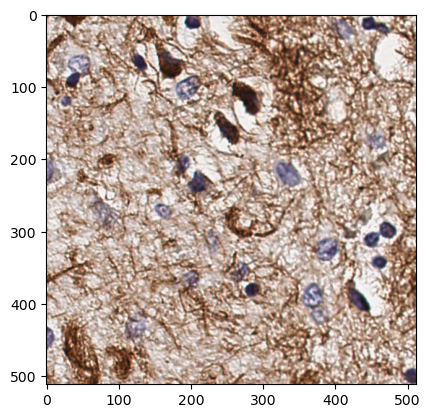

num of labels:  0


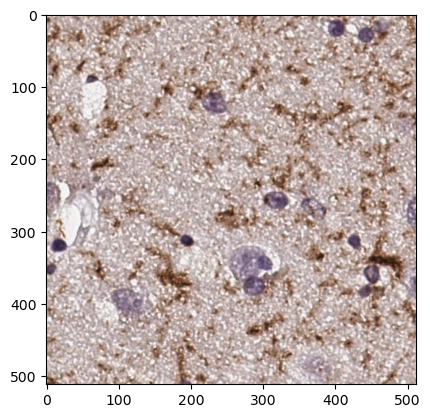

num of labels:  1


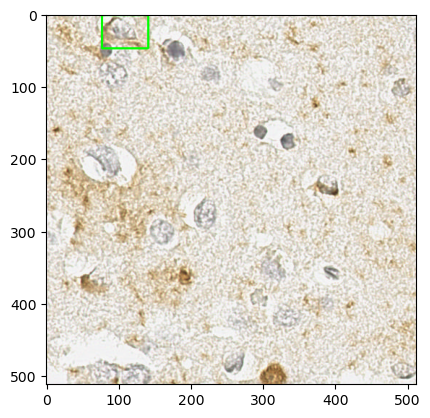

num of labels:  1


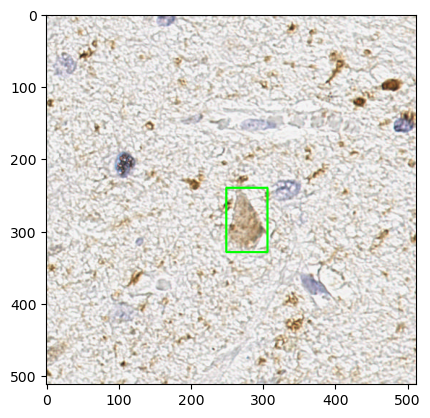

num of labels:  0


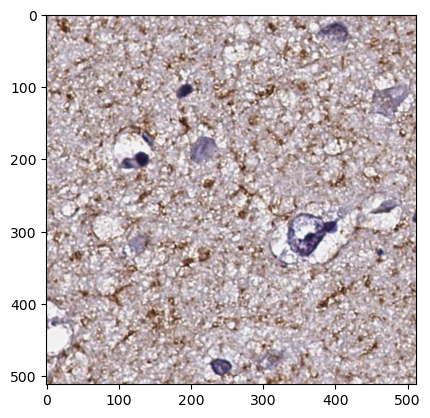

In [13]:
from dataset_operations import randomly_show_img_with_labels

randomly_show_img_with_labels(train_tiles_df)



calculate mean and sd of images to normalize

In [8]:
import cv2
import numpy as np
import os

from dataset_operations import calculate_mean_std
rois_paths = []
for file in os.listdir(img_dir):
    if file.endswith(".png"):
        rois_paths.append(img_dir + file)

calculate_mean_std(rois_paths,img_dir)


Mean: [0.77296131 0.71338682 0.68258603]
Standard Deviation: [0.16751114 0.19680141 0.21965831]
